<a href="https://colab.research.google.com/github/manishverma0822/statistics-python/blob/main/notebooks/Sampling_distributions_%26_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sampling distributions & CLT**

Dataset:
New York City Airbnb Open Data – Kaggle:
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Task:

1. Focus on one numeric column (e.g.,
price
, after removing outliers and zeros).
2. Simulate sampling distributions of the sample mean for different sample sizes
by repeatedly drawing samples and storing the mean (e.g., 5,000repetitions).
3. Plot histograms of these sampling distributions and show how the distribution becomesmore normal and the variance shrinks as
increases.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://huggingface.co/datasets/prithivMLmods/Airbnb-Data-Map-Nyc/resolve/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
price = df["price"].dropna()
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5
price = price[(price>=lower_bound) & (price<=upper_bound)]
#price

In [3]:
sample_with_sample_size_5 = list()
sample_with_sample_size_10 = list()
sample_with_sample_size_20 = list()
sample_with_sample_size_50 = list()
sample_with_sample_size_100 = list()

for _ in range(0,1000):
  random_prices = price.sample(n=5)
  sample_with_sample_size_5.append(random_prices.mean())
  random_prices = price.sample(n=10)
  sample_with_sample_size_10.append(random_prices.mean())
  random_prices = price.sample(n=20)
  sample_with_sample_size_20.append(random_prices.mean())
  random_prices = price.sample(n=50)
  sample_with_sample_size_50.append(random_prices.mean())
  random_prices = price.sample(n=100)
  sample_with_sample_size_100.append(random_prices.mean())


In [4]:
print("Mean & std deviation with sample size 5: " , np.mean(sample_with_sample_size_5)," ", np.std(sample_with_sample_size_5))
print("Mean & std deviation with sample size 10: " , np.mean(sample_with_sample_size_10)," ", np.std(sample_with_sample_size_10))
print("Mean & std deviation with sample size 20: " , np.mean(sample_with_sample_size_20)," ", np.std(sample_with_sample_size_20))
print("Mean & std deviation with sample size 50: " , np.mean(sample_with_sample_size_50)," ", np.std(sample_with_sample_size_50))
print("Mean & std deviation with sample size 100: " , np.mean(sample_with_sample_size_100)," ", np.std(sample_with_sample_size_100))
print("Population Mean & std deviation: " , price.mean()," ", np.std(price))

Mean & std deviation with sample size 5:  120.80920000000002   31.33604307119838
Mean & std deviation with sample size 10:  120.91980000000001   21.966619402174743
Mean & std deviation with sample size 20:  119.5638   15.088769318933867
Mean & std deviation with sample size 50:  119.90544   9.539937652123308
Mean & std deviation with sample size 100:  120.34143999999999   6.644902792848065
Population Mean & std deviation:  119.97031988328288   68.14940569475799


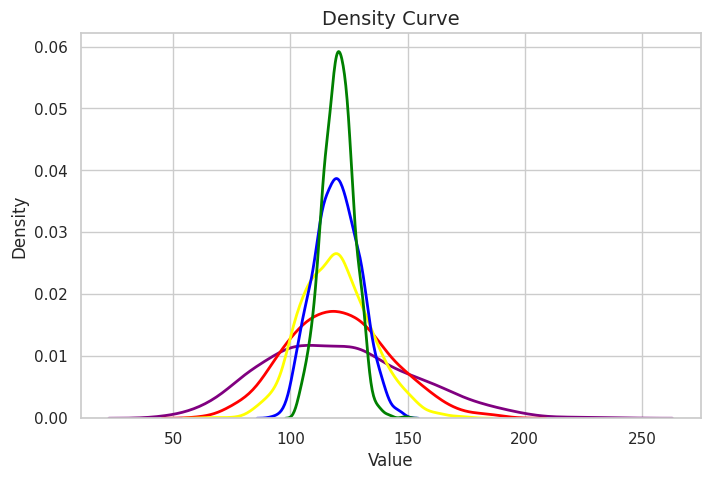

In [6]:
# Set style
sns.set(style="whitegrid")

# Plot KDE curve
plt.figure(figsize=(8, 5))
sns.kdeplot(sample_with_sample_size_5, color="purple", linewidth=2)

sns.kdeplot(sample_with_sample_size_10, color="red", linewidth=2)

sns.kdeplot(sample_with_sample_size_20, color="yellow", linewidth=2)

sns.kdeplot(sample_with_sample_size_50, color="blue", linewidth=2)

sns.kdeplot(sample_with_sample_size_100, color="green", linewidth=2)
# Labels and title
plt.title("Density Curve", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()
